# Loading SDC-System-Integration Waypoint Visualization

In [114]:
import numpy as np
import pandas as pd
#from ast import literal_eval

in_file = '../data/simulator_waypoints.csv'
wpsample = pd.read_csv(in_file, header=0, sep=',')

wpsample.head()

,x,y,z,ax,ay,az,aw
0,1131.220,1183.27,0.15,0,0,0.04362,0.999048
1,909.480,1128.67,0.00,0,0,0.00000,1.000000
2,909.486,1128.67,0.00,0,0,0.00000,1.000000
3,909.500,1128.67,0.00,0,0,0.00000,1.000000
4,909.510,1128.67,0.00,0,0,0.00000,1.000000


In [115]:
wpsample.describe()

,x,y,z,ax,ay,az,aw
count,10903.000000,10903.000000,10903.000000,10903,10903,10903.000000,10903.000000
mean,1358.939549,2124.440205,0.000014,0,0,0.136564,-0.012840
std,809.851203,694.563392,0.001437,0,0,0.712779,0.687911
min,155.794000,1128.670000,0.000000,0,0,-1.000000,-1.000000
25%,479.783500,1425.520000,0.000000,0,-0,-0.563449,-0.657158
50%,1559.620000,2151.750000,0.000000,0,0,0.270539,-0.075039
75%,2151.720000,2885.195000,0.000000,0,0,0.827648,0.650208
max,2339.440000,3005.740000,0.150000,0,0,1.000000,1.000000


In [116]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

In [117]:
waypoint_file = "../data/simulator_waypoints.csv"
final_waypoint_file = "../data/final_waypoints.csv"
tracking_pos_file = "../data/track_pos.csv"
tracking_twist_file = "../data/track_twist.csv"
pure_pursuit_file = "/tmp/pure_pursuit.log"

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_waypoint.append(data[0])
            y_waypoint.append(data[1])
        count += 1

with open(final_waypoint_file) as f:
    x_fwaypoint = []
    y_fwaypoint = []
    az_fwaypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_fwaypoint.append(float(data[0]))
            y_fwaypoint.append(float(data[1]))
            az_fwaypoint.append(np.arcsin(float(data[5])))
        count += 1

with open(tracking_pos_file) as f:
    x_twaypoint = []
    y_twaypoint = []
    az_twaypoint = []
    steer_twaypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_twaypoint.append(float(data[0]))
            y_twaypoint.append(float(data[1]))
            az_twaypoint.append(float(data[5]))
            steer_twaypoint.append(float(data[7]))
        count += 1

with open(tracking_twist_file) as f:
    x_twwaypoint = []
    y_twwaypoint = []
    az_twwaypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_twwaypoint.append(float(data[0]))
            y_twwaypoint.append(float(data[1]))
            az_twwaypoint.append(float(data[5])*10.)
        count += 1

with open(pure_pursuit_file) as f:
    x_pwaypoint = []
    y_pwaypoint = []
    nx_pwaypoint = []
    ny_pwaypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(' ')
            x_pwaypoint.append(float(data[0]))
            y_pwaypoint.append(float(data[1]))
            nx_pwaypoint.append(float(data[2]))
            ny_pwaypoint.append(float(data[3]))
        count += 1


x_start = [ x_waypoint[0] ]
y_start = [ y_waypoint[0] ]

xl_start = [ 0 ]
yl_start = [ 0 ]

tl_x = [ 1148.56, 1559.2, 2122.14, 2175.237, 1493.29, 821.96, 161.76, 351.84 ]
tl_y = [ 1184.65, 1158.43, 1526.79, 1795.71, 2947.67, 2905.8, 2303.82, 1574.65 ]

print "fwaypoint", len(x_fwaypoint)

fwaypoint 200


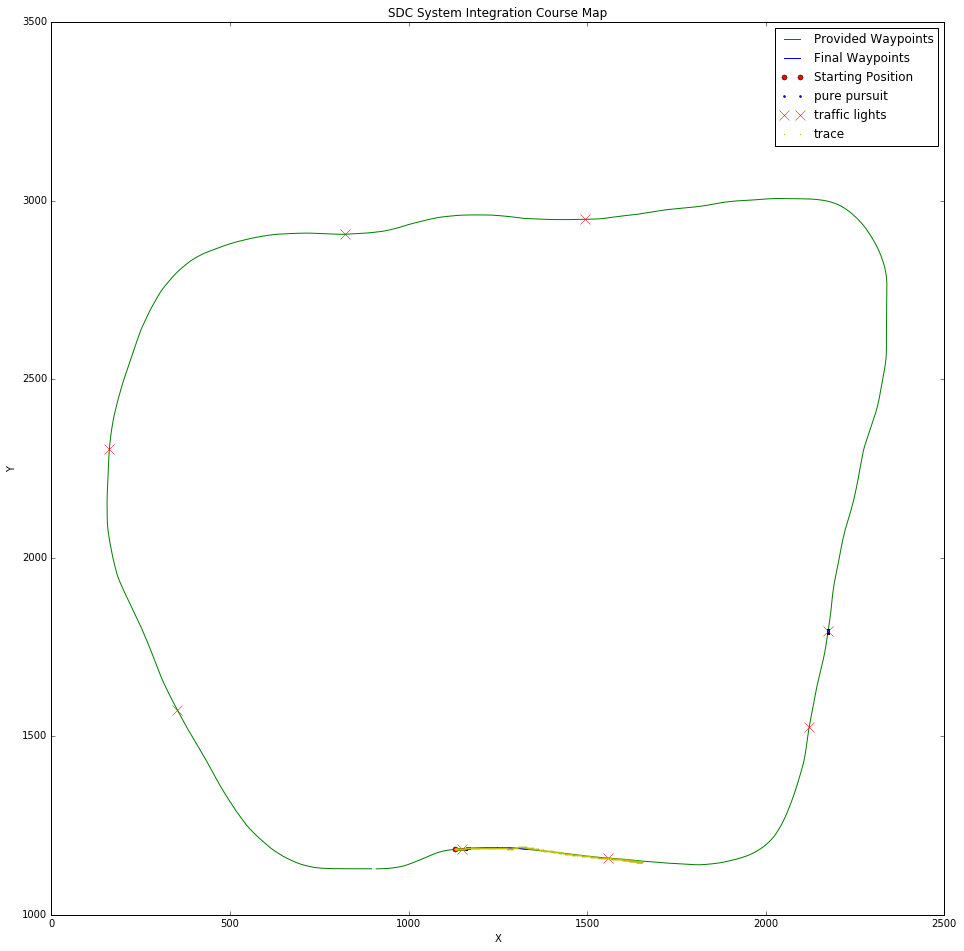

In [118]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot(x_waypoint[1:], y_waypoint[1:], 'g', ms=.5)
p2 = plt.plot(x_fwaypoint[1:], y_fwaypoint[1:], 'b', ms=.5)
p3 = plt.plot(x_start, y_start, 'ro', ms=5.0)
p4 = plt.plot(x_pwaypoint, y_pwaypoint, 'bo', ms=2.0)
p5 = plt.plot(tl_x, tl_y, 'rx', ms=10.0)
p6 = plt.plot(x_twaypoint, y_twaypoint, 'yx', ms=1.0)
plt.title('SDC System Integration Course Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Provided Waypoints', 'Final Waypoints', 'Starting Position', 'pure pursuit', 'traffic lights', 'trace'))
plt.show()

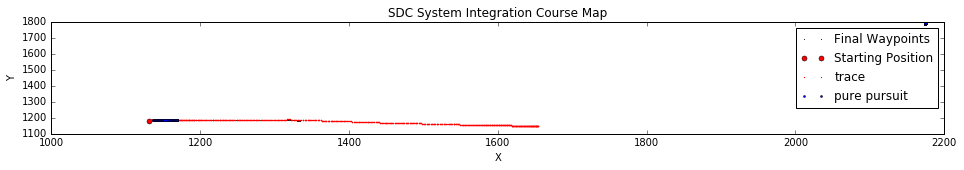

In [119]:
plt.rcParams["figure.figsize"] = [16, 2]
#p1 = plt.plot(x_waypoint[275:330], y_waypoint[275:330], 'go', ms=.5)
p1 = plt.plot(x_fwaypoint, y_fwaypoint, 'go', ms=.5)
p2 = plt.plot(x_start, y_start, 'ro', ms=5.0)
p3 = plt.plot(x_twaypoint, y_twaypoint, 'rx', ms=1.0)
p4 = plt.plot(nx_pwaypoint, ny_pwaypoint, 'bo', ms=2.0)
#p5 = plt.plot(tl_x[:2], tl_y[:2], 'rx', ms=10.0)
plt.title('SDC System Integration Course Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Final Waypoints', 'Starting Position', 'trace', 'pure pursuit'))
plt.show()

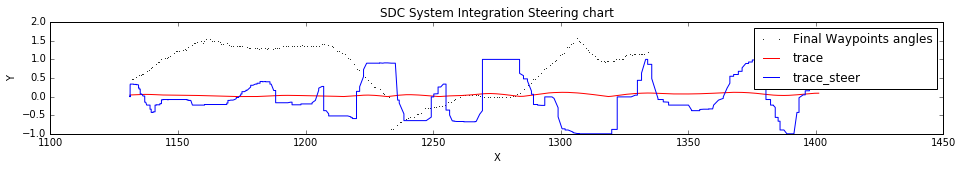

In [121]:
plt.rcParams["figure.figsize"] = [16, 2]
#p1 = plt.plot(x_waypoint[275:330], y_waypoint[275:330], 'go', ms=.5)
p1 = plt.plot(x_fwaypoint, az_fwaypoint, 'go', ms=.5)
#p2 = plt.plot(x_start, y_start, 'ro', ms=5.0)
p3 = plt.plot(x_twaypoint[:1500], az_twaypoint[:1500], 'r', ms=1.0)
p4 = plt.plot(x_twaypoint[:1500], steer_twaypoint[:1500], 'b', ms=.2)
#p5 = plt.plot(tl_x[:2], tl_y[:2], 'rx', ms=10.0)
plt.title('SDC System Integration Steering chart')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p3[0], p4[0]), ('Final Waypoints angles', 'trace', 'trace_steer'))
plt.show()

In [64]:
sample['xydsum'] = sample['xyd'] + sample['nd']
sample['mph'] = sample['xyd']*50.*2.23694
sample.describe()

NameError: name 'sample' is not defined

In [8]:
#sdistance = pd.Series(sample.vd)
#xydistance = pd.Series(sample.xyd)
#fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
#p0 = ax1.plot(sdistance.index, sdistance, 'g', label='delta s')
#p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
#ax1.set_xlabel("Time Steps", fontsize=10)
#ax1.set_ylabel("distance in meters between points", fontsize=10)
#plt.title('Distance between points')
#plt.show()

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


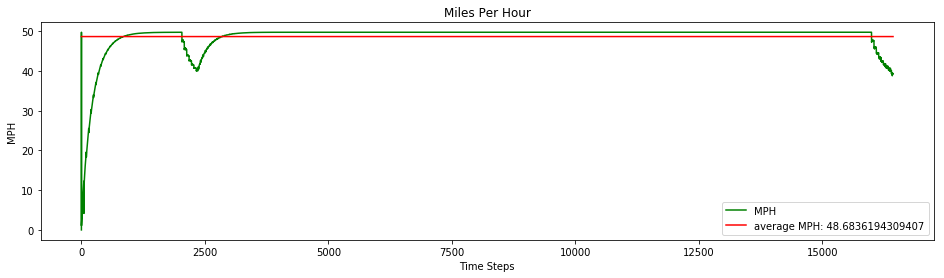

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline
mph = pd.Series(sample.mph)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(mph.index, mph, 'g', label='MPH')
p1 = ax1.plot(mph.index, np.ones(mph.size)*mph.mean(), 'r', label='avg MPH={}'.format(mph.mean()))
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("MPH", fontsize=10)
plt.legend((p0[0],p1[0]), ('MPH', 'average MPH: {}'.format(mph.mean())))
plt.title('Miles Per Hour')
plt.show()

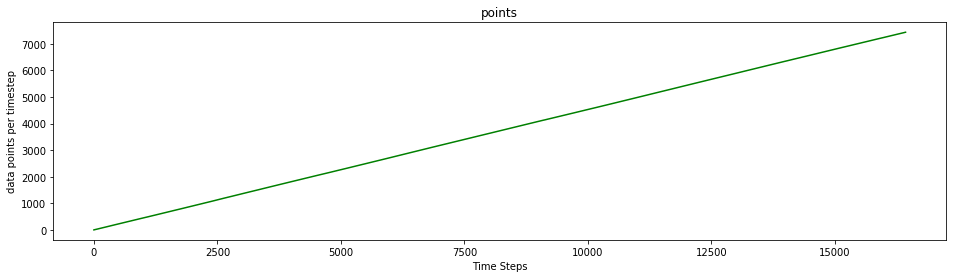

In [5]:
t = pd.Series(sample.t)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(t.index, t, 'g', label='delta s')
#p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("data points per timestep", fontsize=10)
plt.title('points')
plt.show()

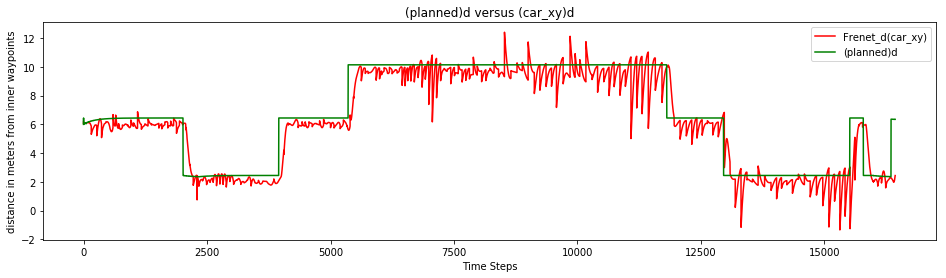

In [6]:
xyd = pd.Series(sample.xydsum)
sdd = pd.Series(sample.d)
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))
p0 = ax1.plot(sdd.index, sdd, 'r', label='(sd)d')
p1 = ax1.plot(xyd.index, xyd, 'g', label='(xy)d')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("distance in meters from inner waypoints", fontsize=10)
plt.legend((p0[0],p1[0]), ('Frenet_d(car_xy)', '(planned)d'))
plt.title('(planned)d versus (car_xy)d')
plt.show()

In [4]:
waypoint_file = "../data/sim_waypoints.csv"

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        data = line.split(',')
        x_waypoint.append(data[0])
        y_waypoint.append(data[1])
        count += 1

x_start = [ 1131.22 ]
y_start = [ 1183.27 ]

In [ ]:
logger_file = "../data/logger.csv"

with open(logger_file) as f:
    x_path = []
    y_path = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_path.append(data[1])
            y_path.append(data[2])
        count += 1

x_current = [ x_path[len(x_path)-1] ]
y_current = [ y_path[len(y_path)-1] ]

#ool_x = [ 328.124, 2209.2, 316.408, 313.927, 402.907, 392.723, 317.528, 317.035, 317.035, 322.769 ]
#ool_y = [ 2781.07, 2990.53, 2766.79, 2763.46, 2844.59, 2838.23, 2768.22, 2768.57, 2767.57, 2774.55 ]

#maxax = [ 965.836, 162.728 ]
#maxay = [ 2926.21, 2347.89 ]


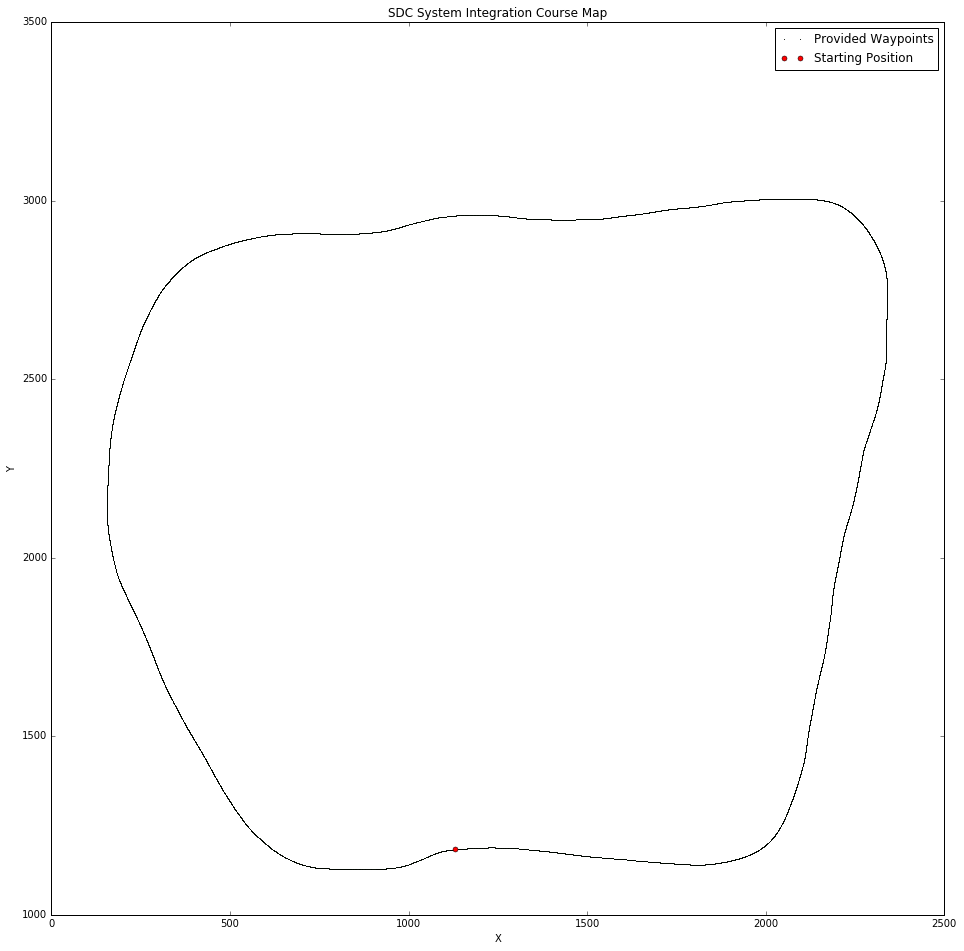

In [11]:
plt.rcParams["figure.figsize"] = [16, 16]
#p1 = plt.plot(x_path, y_path, 'b', lw=1.0)
p2 = plt.plot(x_waypoint, y_waypoint, 'go', ms=.5)
p3 = plt.plot(x_start, y_start, 'ro', ms=5.0)
#p4 = plt.plot(x_current, y_current, 'yo', ms=5.0)
#p5 = plt.plot(ool_x, ool_y, 'rx', ms=15.0)
#p6 = plt.plot(maxax, maxay, 'bx', ms=15.0)
plt.title('SDC System Integration Course Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
#plt.legend((p1[0],p2[0], p3[0], p4[0], p5[0], p6[0]), ('outer lane path','Provided Waypoints', 'Starting Position','End Position', 'out of lane spots', 'max acceleration spots'))
#plt.legend((p1[0],p2[0], p3[0], p4[0]), ('outer lane path','Provided Waypoints', 'Starting Position','End Position'))
plt.legend((p2[0], p3[0]), ('Provided Waypoints', 'Starting Position'))
plt.show()